<div style= "background-color: RGB(0,114,200);">
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Produire une étude de marché
</h2>
</div>

# Rappel du contexte

La poule qui chante est une entreprise française d’agroalimentaire qui souhaite se développer à l'international.
En tant que Data Analyst dans cette entreprise ma mission est de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter les poulets. 

# SOMMAIRE

## I. Importation et nettoyage des fichiers

### 1. Importation des librairies et des fichiers

### 2. Nettoyage des fichiers

        - Préparation des fichiers
        - Jointures des fichiers
        
## II. Analyse exploratoire des fichiers

### 1. Analyse en composantes principales (ACP)
### 2. Clustering
      - Classification ascendante hiérarchique (CAH)
      - K_Means

## III. Conclusion

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> I. Importation et nettoyage des fichiers</h2>
</div>

Les données que nous allons utiliser pour cette étude sont isssues de la FAO (Food and Agriculture Organization) pour l'année 2021.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1. Importation des librairies et des fichiers</h3>
</div>

In [1]:
#Importer les librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.collections import LineCollection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Importer les fichiers
df_Population = pd.read_csv('Population_2021.csv')
df_DispoAlim = pd.read_csv('DisponibiliteAlimentaire_2021.csv')
Stab_Pib = pd.read_csv('Stabilité_politique_et_Pib_2021.csv')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2. Nettoyage des fichiers</h3>
</div>

<div style="background-color: RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color:#fff; text-align: center"> Nettoyage du fichier 'Population'</h4>
</div>

In [3]:
#Afficher les 5 premières lignes de la table
df_Population.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,40099.462,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,710,Afrique du Sud,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,59392.255,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,8,Albanie,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,2854.710,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,12,Algérie,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,44177.969,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,276,Allemagne,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,83408.554,X,Ciffre de sources internationales,NaN


In [4]:
#réorganiser la table
df_pop = df_Population.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur')

df_pop.head() #Afficher les 5 premières lignes de la table

Année,2021
Zone,
Afghanistan,40099.462
Afrique du Sud,59392.255
Albanie,2854.710
Algérie,44177.969
Allemagne,83408.554


In [5]:
# Renommer la colonne '2021' en 'Population'
df_pop.rename(columns={2021: 'Population'}, inplace=True)

df_pop.head() #Affiche les 5 premières lignes de la table

Année,Population
Zone,
Afghanistan,40099.462
Afrique du Sud,59392.255
Albanie,2854.710
Algérie,44177.969
Allemagne,83408.554


In [6]:
# Multiplier la colonne 'population' par 1000
df_pop['Population'] = df_pop['Population'] * 1000

df_pop.head() #Afficher les 5 premières lignes de la table

Année,Population
Zone,
Afghanistan,40099462.0
Afrique du Sud,59392255.0
Albanie,2854710.0
Algérie,44177969.0
Allemagne,83408554.0


In [7]:
#Vérifier les valeurs nulles
df_pop.isnull().sum()

Année
Population    0
dtype: int64

Aucune valeur manquante.

In [8]:
#Vérifier les doublons
df_pop.duplicated().sum()

0

Aucun doublon.

In [9]:
#Calcul de la population mondiale
df_pop['Population'].sum()

9365395016.0

La population mondiale en 2021 n'est pas exacte.

In [10]:
# Filtrer les lignes où la colonne 'Zone' contient le nom "Chine"
chine_data = df_pop[df_pop.index.str.contains('Chine', case=False, na=False)]

# Afficher les résultats
chine_data

Année,Population
Zone,
Chine,1.457935e+09
Chine - RAS de Hong-Kong,7.494578e+06
Chine - RAS de Macao,6.866070e+05
"Chine, Taiwan Province de",2.385991e+07
"Chine, continentale",1.425893e+09


Nous allons garder que l'index Chine car sa population est la somme des autres.

In [11]:
# Supprimer les lignes avec les index spécifiés pour ne garder qu'une seule 'Chine'
index_to_remove = ['Chine - RAS de Hong-Kong', 'Chine - RAS de Macao','Chine, Taiwan Province de', 'Chine, continentale']
df_pop = df_pop.drop(index_to_remove)

# Afficher le DataFrame après suppression
df_pop

Année,Population
Zone,
Afghanistan,40099462.0
Afrique du Sud,59392255.0
Albanie,2854710.0
Algérie,44177969.0
Allemagne,83408554.0
...,...
Îles Salomon,707851.0
Îles Turques-et-Caïques,45114.0
Îles Vierges américaines,100091.0


In [12]:
#Calcul de la population mondiale en 2021
df_pop['Population'].sum()

7907460454.0

Nous avons bien 7,9 milliards de la population mondiale pour l'année 2021.

<div style="background-color: RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color:#fff; text-align: center"> Nettoyage du fichier 'Disponibilité Alimentaire'</h4>
</div>

In [13]:
#Afficher les 5 premières lignes de la table
df_DispoAlim.head() 

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2021,2021,Milliers de tonnes,28.00,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - Quantité,S2734,Viande de Volailles,2021,2021,Milliers de tonnes,33.00,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5072,Variation de stock,S2734,Viande de Volailles,2021,2021,Milliers de tonnes,0.00,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5301,Disponibilité intérieure,S2734,Viande de Volailles,2021,2021,Milliers de tonnes,61.00,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,S2734,Viande de Volailles,2021,2021,g/personne/jour,0.69,E,Valeur estimée


In [14]:
# Sélectionner les colonnes nécessaires à notre analyse 
DispoAlim_2021 = df_DispoAlim[['Zone','Élément','Produit','Valeur']]

DispoAlim_2021.head() #Afficher les 5 premières lignes de la table

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Viande de Volailles,28.00
1,Afghanistan,Importations - Quantité,Viande de Volailles,33.00
2,Afghanistan,Variation de stock,Viande de Volailles,0.00
3,Afghanistan,Disponibilité intérieure,Viande de Volailles,61.00
4,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,0.69


In [15]:
#Réorganiser la table
df_Dispo = DispoAlim_2021.pivot_table(index='Zone', columns='Élément', values = 'Valeur')

df_Dispo.head() #Afficher les 5 premières lignes de la table

Élément,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de protéines en quantité (t),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
Zone,,,,,,,
Afghanistan,0.69,10071.92,61.0,NaN,33.0,28.0,0.0
Afrique du Sud,20.02,434004.91,2632.0,47.0,372.0,1922.0,-385.0
Albanie,10.06,10482.60,63.0,0.0,48.0,14.0,0.0
Algérie,2.64,42519.57,258.0,0.0,0.0,258.0,0.0
Allemagne,8.22,250386.56,1565.0,586.0,768.0,1546.0,163.0


In [16]:
#Vérifier les valeurs nulles
df_Dispo.isnull().sum()

Élément
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité de protéines en quantité (t)                   0
Disponibilité intérieure                                     0
Exportations - Quantité                                     45
Importations - Quantité                                      0
Production                                                   2
Variation de stock                                           0
dtype: int64

Nous avons 45 valeurs nulles compatibilisées pour la colonne "Exportations - Quantité". Deux choix s'offrent à nous:  
- Choix 1 : remplacer les valeurs nulles par 0
- Choix 2 : appliquer une formule de calcul à l'aide d'informations déjà présentes dans ce df  
[Source du calcul](https://www.fao.org/3/X9892F/x9892f03.htm) où Exportations = Production  + Importations − Disponibilité intérieure + Variation de stock

In [17]:
# Optons pour le Choix 2: remplacer les valeurs manquantes par le calcul
df_Dispo['Exportations - Quantité'] = df_Dispo.apply(
    lambda x : ((x['Production'] + x['Importations - Quantité'] + 
                 x['Variation de stock']) 
                - x['Disponibilité intérieure'])
    if pd.isnull(x['Exportations - Quantité']) else x['Exportations - Quantité'], axis=1)

df_Dispo.head() #Affiche les 5 premières lignes de la table

Élément,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de protéines en quantité (t),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
Zone,,,,,,,
Afghanistan,0.69,10071.92,61.0,0.0,33.0,28.0,0.0
Afrique du Sud,20.02,434004.91,2632.0,47.0,372.0,1922.0,-385.0
Albanie,10.06,10482.60,63.0,0.0,48.0,14.0,0.0
Algérie,2.64,42519.57,258.0,0.0,0.0,258.0,0.0
Allemagne,8.22,250386.56,1565.0,586.0,768.0,1546.0,163.0


In [18]:
#Vérifier à nouveau les valeur nulles
df_Dispo.isnull().sum()

Élément
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (t)                  0
Disponibilité intérieure                                    0
Exportations - Quantité                                     2
Importations - Quantité                                     0
Production                                                  2
Variation de stock                                          0
dtype: int64

Une grande partie des valeurs manquantes a été remplacé par le calcul. Cependant, il reste encore des valeurs nulles dans les exportations, c'est peut-être du au fait qu'il y'a des valeures nulles dans la colonne Production.

In [19]:
# Colonnes à retirer
colonnes_a_retirer = ['Disponibilité de protéines en quantité (t)', 'Variation de stock'] 

# Retirer les colonnes non nécessaires à notre analyse 
df_Dispo.drop(columns=colonnes_a_retirer, inplace=True)

df_Dispo.head() # Afficher les 5 premières lignes du DataFrame mis à jour

Élément,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,
Afghanistan,0.69,61.0,0.0,33.0,28.0
Afrique du Sud,20.02,2632.0,47.0,372.0,1922.0
Albanie,10.06,63.0,0.0,48.0,14.0
Algérie,2.64,258.0,0.0,0.0,258.0
Allemagne,8.22,1565.0,586.0,768.0,1546.0


<div style="background-color: RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color:#fff; text-align: center"> Nettoyage du fichier 'Stabilité politique et PIB'</h4>
</div>

In [20]:
#Afficher les 5 premières lignes de la table
Stab_Pib.head() 

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,Int$/cap,1516.30,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,NaN,-2.53,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,Int$/cap,13311.90,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,NaN,-0.71,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,Int$/cap,14516.30,X,Ciffre de sources internationales,NaN


In [21]:
# Sélectionner les colonnes nécessaires à notre analyse 
df_Stab_Pib = Stab_Pib[['Zone','Produit','Valeur']]

df_Stab_Pib.head() #Afficher les 5 premières lignes de la table

,Zone,Produit,Valeur
0,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",1516.30
1,Afghanistan,Stabilité politique et absence de violence/ter...,-2.53
2,Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",13311.90
3,Afrique du Sud,Stabilité politique et absence de violence/ter...,-0.71
4,Albanie,"PIB par habitant, ($ PPA internationaux consta...",14516.30


In [22]:
#Réorganiser la table
Stab_Pib2021 = df_Stab_Pib.pivot_table(index='Zone', columns='Produit', values = 'Valeur')

Stab_Pib2021.head() #Afficher les 5 premières lignes de la table

Produit,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice)
Zone,,
Afghanistan,1516.3,-2.53
Afrique du Sud,13311.9,-0.71
Albanie,14516.3,0.11
Algérie,11039.8,-0.88
Allemagne,53179.7,0.76


In [23]:
# Renommer les colonnes 
Stab_Pib2021.rename(columns={'PIB par habitant, ($ PPA internationaux constants de 2017)': 'PIB par habitant','Stabilité politique et absence de violence/terrorisme (indice)': 'Stabilité politique'}, inplace=True)

Stab_Pib2021.head() #Afficher les 5 premières lignes de la table

Produit,PIB par habitant,Stabilité politique
Zone,,
Afghanistan,1516.3,-2.53
Afrique du Sud,13311.9,-0.71
Albanie,14516.3,0.11
Algérie,11039.8,-0.88
Allemagne,53179.7,0.76


In [24]:
#Vérifier les valeur nulles
Stab_Pib2021.isnull().sum()

Produit
PIB par habitant       12
Stabilité politique     2
dtype: int64

Nous avons 12 pays qui n'ont pas de données du PIB et/ou d'indice de stabilité politique.

<div style="background-color: RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color:#fff; "> Jointures des fichiers </h3>
</div>

In [25]:
#Première jointure entre les fichiers population et dispo_alim
join_1 =df_Dispo.merge(df_pop,on='Zone',how='inner')

join_1.head()  #Afficher les 5 premières lignes de la table

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population
Zone,,,,,,
Afghanistan,0.69,61.0,0.0,33.0,28.0,40099462.0
Afrique du Sud,20.02,2632.0,47.0,372.0,1922.0,59392255.0
Albanie,10.06,63.0,0.0,48.0,14.0,2854710.0
Algérie,2.64,258.0,0.0,0.0,258.0,44177969.0
Allemagne,8.22,1565.0,586.0,768.0,1546.0,83408554.0


In [26]:
# Deuxième jointure entre les fichiers intermédiaire et Stabilité politique + PIB
df_final = join_1.merge(Stab_Pib2021,on='Zone',how='inner')

df_final.head()  #Afficher les 5 premières lignes de la table

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,,
Afghanistan,0.69,61.0,0.0,33.0,28.0,40099462.0,1516.3,-2.53
Afrique du Sud,20.02,2632.0,47.0,372.0,1922.0,59392255.0,13311.9,-0.71
Albanie,10.06,63.0,0.0,48.0,14.0,2854710.0,14516.3,0.11
Algérie,2.64,258.0,0.0,0.0,258.0,44177969.0,11039.8,-0.88
Allemagne,8.22,1565.0,586.0,768.0,1546.0,83408554.0,53179.7,0.76


In [27]:
#Vérifier les valeurs nulles du fichier final
df_final.isnull().sum()

Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    0
Exportations - Quantité                                     2
Importations - Quantité                                     0
Production                                                  2
Population                                                  0
PIB par habitant                                            8
Stabilité politique                                         1
dtype: int64

Nous avons des valeurs manquantes dans notre fichier final, nous allons donc les regrouper dans un autre ficher.

In [28]:
# Regrouper les pays avec des valeurs nulles dans un autre DF pour les retraiter par la suite
df_with_nan = df_final[df_final.isna().any(axis=1)]

df_with_nan.head()  #Afficher les 5 premières lignes de la table

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,,
Chine,7.94,25657.0,667.0,2075.0,24618.0,1.457935e+09,17846.7,NaN
Cuba,14.88,371.0,12.0,359.0,18.0,1.125637e+07,NaN,0.43
Djibouti,1.91,5.0,NaN,5.0,NaN,1.105557e+06,4913.3,-0.71
Koweït,23.09,217.0,6.0,158.0,65.0,4.250114e+06,NaN,0.30
Maldives,7.99,9.0,NaN,15.0,NaN,5.214570e+05,18765.2,0.50


In [29]:
# Enregistrer le fichier avec les valeurs nulles au format csv 
df_with_nan.to_csv('df_with_nan.csv')

In [30]:
# Suppression des valeurs NaN dans le fichier final
df_final.dropna(inplace=True)

In [31]:
#Vérifier à nouveau les valeur nulles
df_final.isnull().sum()

Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    0
Exportations - Quantité                                     0
Importations - Quantité                                     0
Production                                                  0
Population                                                  0
PIB par habitant                                            0
Stabilité politique                                         0
dtype: int64

Aucune valeur nulle.

In [32]:
#Vérifier les doublons
df_final.duplicated().sum()

0

Aucun doublon dans le fichier final.

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Corrélation entre les différentes variables</h4>
</div>

Text(0.5, 1.0, 'Corrélation entre les différentes variables')

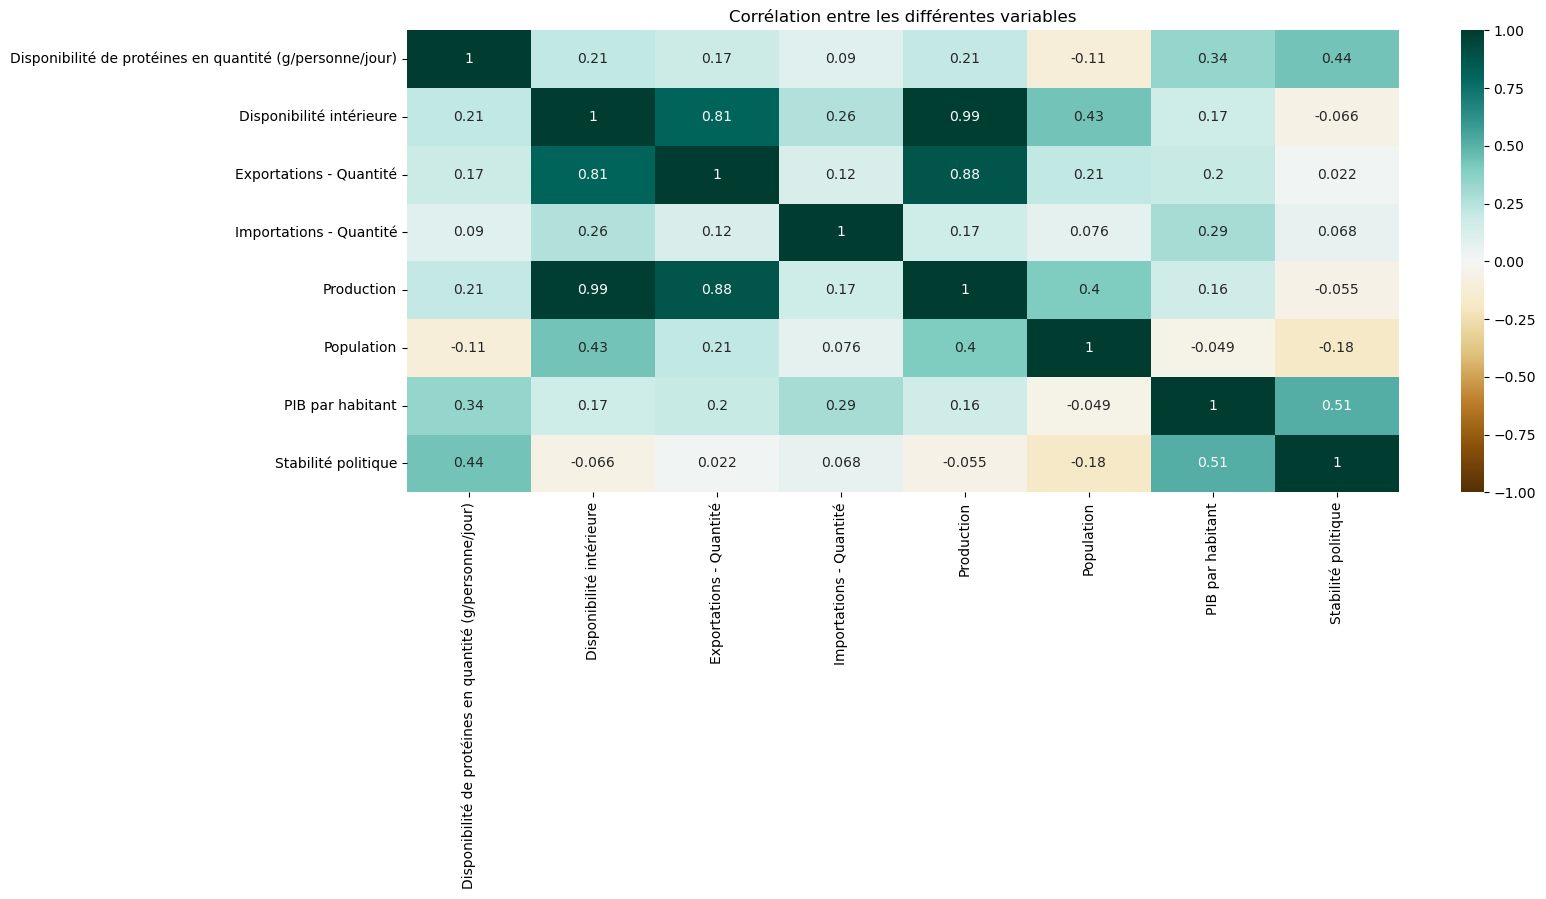

In [33]:
# heatmap de corrélations entre les différentes variables
plt.figure(figsize=(16, 6))
sns.heatmap(df_final.corr(),cmap='BrBG', vmin=-1, vmax=1, annot=True)
plt.title('Corrélation entre les différentes variables')


#### Observation
- La disponibilité intérieure est très corrélée à la production, nous pouvons alors la supprimer.
- La population est anticorrélée à la stabilité politique , au Pib par habibant et à la disponibilité en proteine en quantité par personne

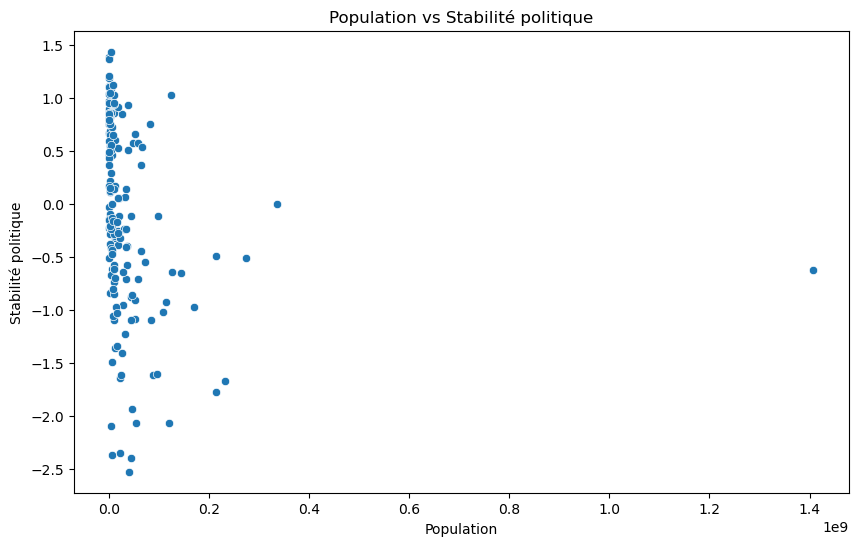

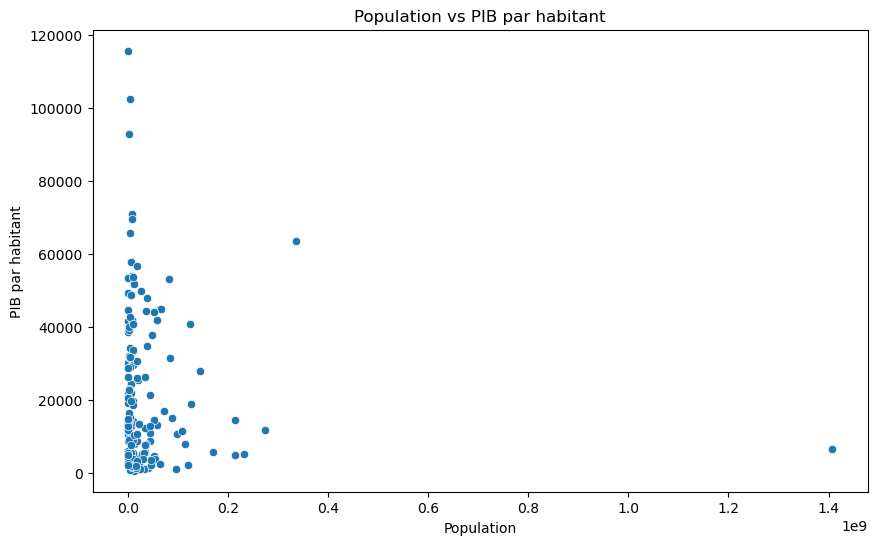

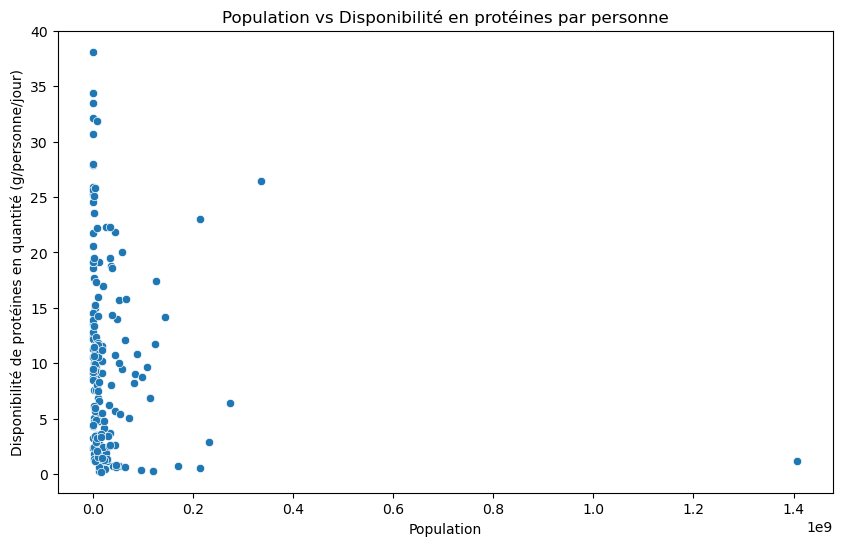

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot Population vs Stabilité politique
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='Population', y='Stabilité politique')
plt.title('Population vs Stabilité politique')
plt.xlabel('Population')
plt.ylabel('Stabilité politique')
plt.show()

# Scatter plot Population vs PIB par habitant
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='Population', y='PIB par habitant')
plt.title('Population vs PIB par habitant')
plt.xlabel('Population')
plt.ylabel('PIB par habitant')
plt.show()

# Scatter plot Population vs Disponibilité en protéines par personne
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='Population', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title('Population vs Disponibilité en protéines par personne')
plt.xlabel('Population')
plt.ylabel('Disponibilité de protéines en quantité (g/personne/jour)')
plt.show()

In [35]:
# Supprimer la colonne 'Disponibilité intérieure'
df_final.drop(columns=['Disponibilité intérieure'], inplace=True)

df_final.head() #Affiche les 5 premières lignes de la table

,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,
Afghanistan,0.69,0.0,33.0,28.0,40099462.0,1516.3,-2.53
Afrique du Sud,20.02,47.0,372.0,1922.0,59392255.0,13311.9,-0.71
Albanie,10.06,0.0,48.0,14.0,2854710.0,14516.3,0.11
Algérie,2.64,0.0,0.0,258.0,44177969.0,11039.8,-0.88
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76


In [36]:
#Renommer certaines colonnes dans le df final
df_final.rename(columns={'Exportations - Quantité': 'Exportations', 'Importations - Quantité': 'Importations'}, inplace=True)

df_final.head() #Affiche les 5 premières lignes de la table

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,
Afghanistan,0.69,0.0,33.0,28.0,40099462.0,1516.3,-2.53
Afrique du Sud,20.02,47.0,372.0,1922.0,59392255.0,13311.9,-0.71
Albanie,10.06,0.0,48.0,14.0,2854710.0,14516.3,0.11
Algérie,2.64,0.0,0.0,258.0,44177969.0,11039.8,-0.88
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Distribution variables</h4>
</div>

<Axes: ylabel='Stabilité politique'>

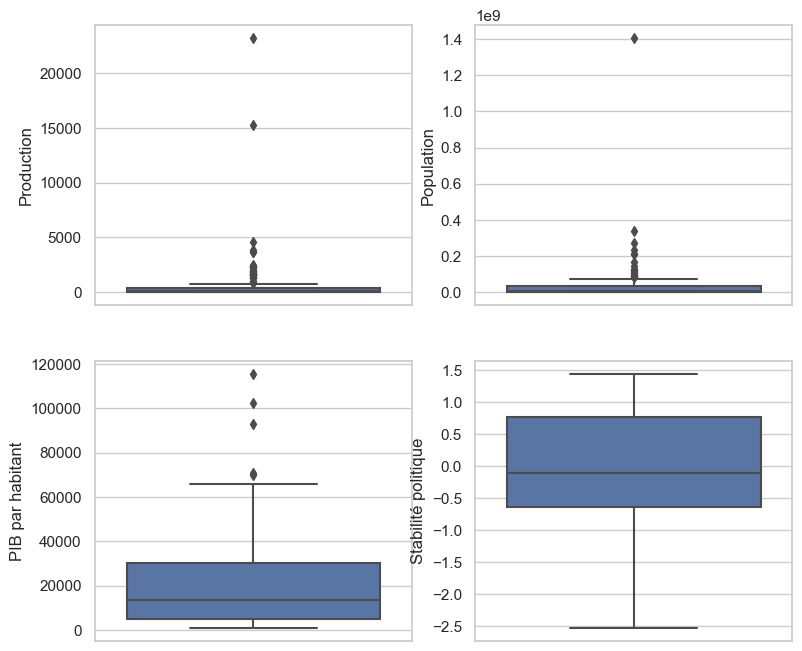

In [37]:
# Afficher les boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_final,y='Production')
plt.subplot(222)
sns.boxplot(data=df_final, y='Population')
plt.subplot(223)
sns.boxplot(data=df_final, y='PIB par habitant')
plt.subplot(224)
sns.boxplot(data=df_final,y='Stabilité politique')


<Axes: ylabel='Importations'>

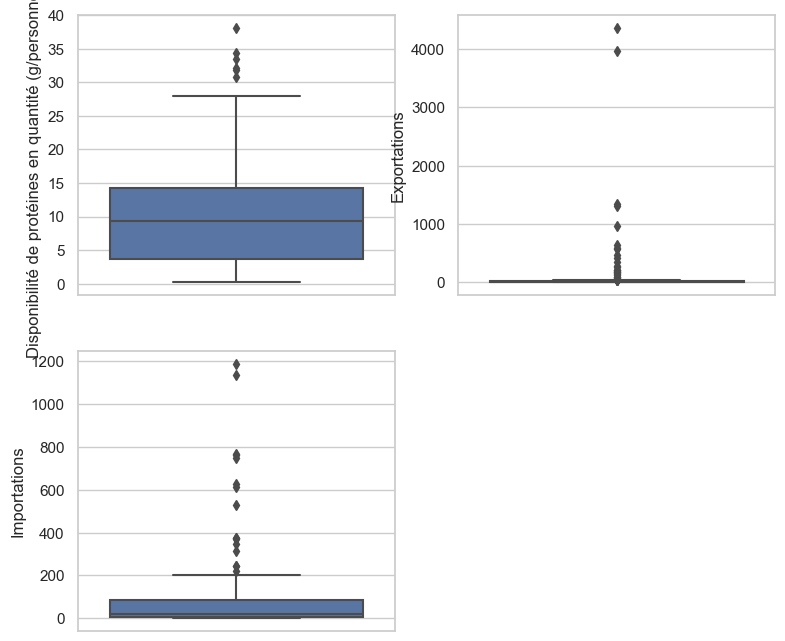

In [38]:
# Afficher les boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_final,y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.subplot(222)
sns.boxplot(data=df_final, y='Exportations')
plt.subplot(223)
sns.boxplot(data=df_final,y='Importations')


In [39]:
#Afficher les valeurs extrême de la 'Population'
df_final.sort_values(by = ['Population'], ascending = False).head()

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,
Inde,1.19,4.0,0.0,3714.0,1.407564e+09,6592.0,-0.62
États-Unis d'Amérique,26.40,3959.0,144.0,23223.0,3.369976e+08,63669.7,0.00
Indonésie,6.40,0.0,0.0,3889.0,2.737532e+08,11858.1,-0.51
Pakistan,2.89,7.0,0.0,1814.0,2.314021e+08,5232.1,-1.67
Brésil,23.01,4367.0,5.0,15216.0,2.143262e+08,14592.4,-0.49


In [40]:
#Afficher les valeurs extrême  pour les'Exportations'
df_final.sort_values(by = ['Exportations'], ascending = False).head()

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,
Brésil,23.01,4367.0,5.0,15216.0,214326223.0,14592.4,-0.49
États-Unis d'Amérique,26.40,3959.0,144.0,23223.0,336997624.0,63669.7,0.00
Pologne,14.31,1347.0,69.0,2529.0,38307726.0,34915.5,0.51
Pays-Bas (Royaume des),5.51,1306.0,763.0,887.0,17501696.0,56617.4,0.92
Thaïlande,5.09,962.0,2.0,1845.0,71601103.0,17077.0,-0.55


Nous observons des valeurs abbérantes pour toutes les variables à l'exception de la stabilité politique mais nous optons pour l'exclusion de trois valeurs extrêmes dont les pays concernés sont: 
- Brésil (Exportations) = 4367 Milliers de tonnes	
- États-Unis d'Amérique (Exportations) = 3959 Milliers de tonnes
- Inde (Population) = 1,4 Milliards de population

In [41]:
# Regroupement des pays avec des valeur extrêmes dans un autre DF pour les retraiter par la suite
pays_a_extraire = ['Inde', 'Brésil', "États-Unis d'Amérique"]

# Créer un nouveau DataFrame avec les index spécifiés
df_with_outlier = df_final.loc[pays_a_extraire]

df_with_outlier.head()  #Afficher  la table

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,
Inde,1.19,4.0,0.0,3714.0,1.407564e+09,6592.0,-0.62
Brésil,23.01,4367.0,5.0,15216.0,2.143262e+08,14592.4,-0.49
États-Unis d'Amérique,26.40,3959.0,144.0,23223.0,3.369976e+08,63669.7,0.00


In [42]:
# Enregistrement le fichier avec les valeurs extrêmes au format csv 
df_with_outlier.to_csv('df_with_outlier.csv')

In [43]:
# Supprimer les pays avec les valeurs extrêmes dans le fichier final
df_final.drop(index=pays_a_extraire, inplace=True)

In [44]:
# Supprimer la France dans le df final
df_final.drop('France', inplace=True)

In [45]:
# Enregistrement du df final au format csv
df_final.to_csv('df_final.csv')